In [2]:
from dataset_splits import process_pickle_bysplit

In [1]:
modelnet_version = 40

In [5]:
train_dict = process_pickle_bysplit(f'dataset_splits/ModelNet{str(modelnet_version)}_TrainingSplits_New.pickle', 5)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import os.path as osp
import numpy as np

import torch
import torch.nn.functional as F
from torch.nn import Sequential as Seq, Linear as Lin, ReLU, BatchNorm1d as BN
from torch_geometric.datasets import ModelNet
import torch_geometric.transforms as T
from torch_geometric.data import Batch, DataLoader, Data, InMemoryDataset
from torch_geometric.nn import PointConv, fps, radius, global_max_pool

from utils.data import BlockBatch, BlockDataLoader
from utils.datasets import BlockModelNet
from models import BlockPointNet

#from examples.pointnet2_pretext import Net

ImportError: cannot import name 'BlockPointNet'

In [ ]:
from dataset_splits import process_pickle_bysplit
import glob

In [3]:
import sys
import argparse
import os.path as osp
sys.path.insert(1, '..')

#Torch Imports
import torch
import torch.nn.functional as F
#from torch_geometric.datasets import ModelNet
import torch_geometric.transforms as T
from torch_geometric.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

#Internal Imports
from models import PointNetSeg
from context import Trainer
from utils.datasets import ShapeNet
from dataset_splits import process_pickle_bysplit

/home/trace/.conda/envs/3d_context/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/trace/.conda/envs/3d_context/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/trace/.conda/envs/3d_context/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/trace/.conda/envs/3

In [7]:
train_dict = process_pickle_bysplit(f'dataset_splits/ShapeNet16_TrainingSplits.pickle', 10)
path = 'data/ShapeNet'

pre_transform = T.NormalizeScale()

transform = T.Compose([
    T.RandomTranslate(0.01),
    T.RandomRotate(15, axis=0),
    T.RandomRotate(15, axis=1),
    T.RandomRotate(15, axis=2)
])

train_dataset = ShapeNet(path, None, True, transform, pre_transform,
                         processed_name='subset_10',
                         train_dict=train_dict)

In [9]:
train_dataset[0]

Data(category=[1], pos=[2712, 3], y=[2712])

In [6]:
train_dict = process_pickle_bysplit(f'dataset_splits/ShapeNet16_TrainingSplits.pickle', 10)

In [12]:
point_paths = sorted(train_dict['02691156'])

In [22]:
train_dict['02691156'][0][:-4] + '.seg'

'002412.seg'

TypeError: join() argument must be str or bytes, not 'list'

In [15]:
sorted(glob.glob(osp.join('data/ShapeNet/raw/train_data', '02691156', '*.pts')))

['data/ShapeNet/raw/train_data/02691156/000001.pts',
 'data/ShapeNet/raw/train_data/02691156/000020.pts',
 'data/ShapeNet/raw/train_data/02691156/000022.pts',
 'data/ShapeNet/raw/train_data/02691156/000023.pts',
 'data/ShapeNet/raw/train_data/02691156/000029.pts',
 'data/ShapeNet/raw/train_data/02691156/000035.pts',
 'data/ShapeNet/raw/train_data/02691156/000043.pts',
 'data/ShapeNet/raw/train_data/02691156/000052.pts',
 'data/ShapeNet/raw/train_data/02691156/000054.pts',
 'data/ShapeNet/raw/train_data/02691156/000065.pts',
 'data/ShapeNet/raw/train_data/02691156/000069.pts',
 'data/ShapeNet/raw/train_data/02691156/000070.pts',
 'data/ShapeNet/raw/train_data/02691156/000076.pts',
 'data/ShapeNet/raw/train_data/02691156/000085.pts',
 'data/ShapeNet/raw/train_data/02691156/000093.pts',
 'data/ShapeNet/raw/train_data/02691156/000097.pts',
 'data/ShapeNet/raw/train_data/02691156/000098.pts',
 'data/ShapeNet/raw/train_data/02691156/000103.pts',
 'data/ShapeNet/raw/train_data/02691156/000112

In [3]:
path = osp.join(
    osp.dirname(osp.realpath('Untitled.ipynb')), 'data/ModelNet10')
pre_transform = T.Compose([
    T.NormalizeScale(),
    T.SamplePoints(10000)
])
transform = None
train_dataset = BlockModelNet(path, '10', True, transform, pre_transform)
test_dataset = BlockModelNet(path, '10', False, transform, pre_transform)
train_loader = BlockDataLoader(train_dataset, batch_size=16, shuffle=True,
                          num_workers=6)
test_loader = BlockDataLoader(test_dataset, batch_size=16, shuffle=False,
                         num_workers=6)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = BlockPointNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [4]:
# path = osp.join(
#     osp.dirname(osp.realpath('Untitled.ipynb')), 'data/ModelNet10')
# pre_transform, transform = T.NormalizeScale(), T.SamplePoints(2**13)
# train_dataset = ModelNet(path, '10', True, transform, pre_transform)
# test_dataset = ModelNet(path, '10', False, transform, pre_transform)
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True,
#                           num_workers=6)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False,
#                          num_workers=6)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = Net().to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [6]:
for i, batch in enumerate(train_loader):
    
    model.train()
    batch = batch.to(device)
    optimizer.zero_grad()

    try:
        y_hat = model(batch)
    except ValueError:
        pass

    loss = F.nll_loss(y_hat, batch.y)
    loss.backward()
    optimizer.step()
    
    break

In [21]:
sa0_out1 = (batch.x, batch.input1, batch.batch1)
sa1_out1 = model.sa1_module(*sa0_out1)
sa2_out1 = model.sa2_module(*sa1_out1)
sa3_out1 = model.sa3_module(*sa2_out1)
x1, pos1, batch1 = sa3_out1

In [22]:
sa0_out2 = (batch.x, batch.input2, batch.batch2)
sa1_out2 = model.sa1_module(*sa0_out2)
sa2_out2 = model.sa2_module(*sa1_out2)
sa3_out2 = model.sa3_module(*sa2_out2)
x2, pos2, batch2 = sa3_out2

In [26]:
x = torch.cat([x1, x2], dim=1)

In [24]:
x = F.relu(model.lin1(x))
x = F.dropout(x, p=0.5, training=model.training)
x = F.relu(model.lin2(x))
x = F.dropout(x, p=0.5, training=model.training)
x = model.lin3(x)

x = F.log_softmax(x, dim=-1)

In [27]:
x.shape

torch.Size([16, 2048])

In [ ]:
model(batch)

In [12]:
model.train()
batch = batch.to(device)
optimizer.zero_grad()

try:
    y_hat = model(batch)
except ValueError:
    pass

loss = F.nll_loss(y_hat, batch.y)
loss.backward()
optimizer.step()

In [5]:
model.train()

for i, batch in enumerate(train_loader):
    
    if i == 1:
        break

    batch = batch.to(device)
    optimizer.zero_grad()

    try:
        y_hat = model(batch)
    except ValueError:
        continue

    loss = F.nll_loss(y_hat, batch.y)
    loss.backward()
    optimizer.step()

In [6]:
y_hat

tensor([[-0.5833, -1.3225, -4.5300, -3.9541, -4.6630, -3.2685, -2.3401, -6.3777],
        [-0.7727, -1.3256, -3.9121, -3.6510, -3.2893, -1.8789, -3.5103, -5.0060],
        [-1.0495, -3.3946, -4.6569, -3.2365, -0.6195, -6.5244, -3.6188, -6.8652],
        [-1.9340, -2.5388, -0.9728, -2.0575, -2.2793, -2.6808, -2.3908, -4.7961],
        [-2.0171, -1.6565, -2.3866, -1.8654, -1.3523, -3.4629, -2.2466, -3.3924],
        [-1.1714, -4.4068, -2.1356, -3.2328, -2.1495, -5.8132, -0.9270, -5.3032],
        [-1.1144, -1.9246, -1.0469, -4.0944, -2.3589, -4.3340, -3.0390, -5.8894],
        [-1.4102, -3.5970, -2.7702, -3.1675, -1.8196, -1.7126, -1.3139, -4.3821],
        [-0.8850, -3.1971, -4.5354, -3.9609, -1.0201, -4.4585, -2.1146, -3.7376],
        [-1.3592, -1.9093, -1.9154, -1.7360, -4.3851, -3.4177, -1.5353, -4.5274],
        [-0.3094, -4.9101, -5.1835, -1.6763, -3.6900, -3.7495, -4.1878, -6.0239],
        [-1.9171, -3.3035, -2.3419, -1.1254, -2.3291, -1.9624, -1.8739, -5.4917],
        [-0.3012

In [7]:
batch.y

tensor([3, 2, 7, 5, 7, 4, 1, 7, 7, 6, 1, 4, 6, 2, 7, 4])

In [8]:
class BlockBatch(Data):
    r"""A plain old python object modeling a batch of graphs as one big
    (dicconnected) graph. With :class:`torch_geometric.data.Data` being the
    base class, all its methods can also be used here.
    In addition, single graphs can be reconstructed via the assignment vector
    :obj:`batch`, which maps each node to its respective graph identifier.
    """

    def __init__(self, batch=None, **kwargs):
        super(BlockBatch, self).__init__(**kwargs)

        self.batch = batch
        self.__data_class__ = Data
        self.__slices__ = None

In [44]:
data_list = [train_dataset[i] for i in range(3)]
follow_batch = []

In [45]:
keys = [set(data.keys) for data in data_list]
keys = list(set.union(*keys))
assert 'batch' not in keys

In [46]:
batch = BlockBatch()
batch.__data_class__ = data_list[0].__class__
batch.__slices__ = {key: [0] for key in keys}

In [47]:
for key in keys:
    batch[key] = []

for key in follow_batch:
    batch['{}_batch'.format(key)] = []

In [48]:
cumsum = {key: 0 for key in keys}
batch.batch1 = []
batch.batch2 = []

In [49]:
i = 0
data = data_list[0]

In [57]:
j = 1
keys = data.keys
key = keys[j]

In [58]:
item = data[key]
if torch.is_tensor(item) and item.dtype != torch.bool:
    item = item + cumsum[key]
if torch.is_tensor(item):
    size = item.size(data.__cat_dim__(key, data[key]))
else:
    size = 1
batch.__slices__[key].append(size + batch.__slices__[key][-1])
cumsum[key] += data.__inc__(key, item)
batch[key].append(item)

In [59]:
if key in follow_batch:
    item = torch.full((size, ), i, dtype=torch.long)
    batch['{}_batch'.format(key)].append(item)

In [66]:
if key == 'input1':
    item = torch.full((data[key].shape[0], ), i, dtype=torch.long)
    batch.batch1.append(item)
elif key == 'input2':
    item = torch.full((data[key].shape[0], ), i, dtype=torch.long)
    batch.batch2.append(item)

In [67]:
batch

BlockBatch(batch1=[tensor([0, 0, 0,  ..., 0, 0, 0])], batch2=[], input1=[tensor([[-1.1002,  1.3327,  1.0811],
        [-0.1863, -0.1196, -0.7593],
        [ 0.3199, -0.2447, -0.9447],
        ...,
        [-0.1952, -0.5812, -0.7520],
        [-1.2103,  0.1218,  1.9542],
        [ 0.9859, -1.5897,  1.1079]])], input2=[], y=[tensor([1])])

In [39]:
batch = Batch.from_data_list([train_dataset[i] for i in range(3)]).batch

In [40]:
slices = Batch.from_data_list([train_dataset[i] for i in range(3)]).__slices__

In [43]:
batch[8192:16384]

tensor([1, 1, 1,  ..., 1, 1, 1])

In [42]:
slices['pos']

[0, 8192, 16384, 24576]

In [11]:
set(data.batch1.numpy())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [12]:
set(data.batch2.numpy())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [14]:
data.__slices__

{'y': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 'input2': [0,
  1220,
  2652,
  3898,
  5760,
  7604,
  9343,
  11341,
  11935,
  13201,
  14460,
  15706,
  16502,
  17613,
  18775,
  20046,
  22059],
 'input1': [0,
  1153,
  2217,
  3440,
  4969,
  5681,
  6439,
  8429,
  9014,
  10417,
  11682,
  12917,
  14671,
  16069,
  17449,
  18676,
  20724]}

In [11]:
data.batch1[1267]

tensor(0)

In [13]:
data.batch2[816]

tensor(1)

In [9]:
data.__slices__

{'input1': [0,
  1268,
  2296,
  3544,
  4327,
  5251,
  5422,
  6194,
  6652,
  7529,
  8269,
  9236,
  9956,
  10899,
  11818,
  12780,
  13642],
 'input2': [0,
  816,
  2354,
  3152,
  4440,
  5512,
  5701,
  6959,
  7671,
  8401,
  9271,
  10320,
  11685,
  12537,
  13635,
  15059,
  16253],
 'y': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]}

In [ ]:
data_list = []
for i in range(16):
    data = train_dataset[i]
    data[]

In [10]:
Batch.from_data_list?

In [5]:
t = torch.load('data/ModelNet10/processed/training.pt')

In [6]:
t

(Data(input1=[228859904, 3], input2=[228859904, 3], y=[223496]),
 {'y': tensor([     0,      1,      2,  ..., 223494, 223495, 223496]),
  'input1': tensor([        0,      1064,      2128,  ..., 228857422, 228858663,
          228859904]),
  'input2': tensor([        0,      1001,      1991,  ..., 228858358, 228859080,
          228859904])})

In [25]:
train_dataset[3:15].data

Data(input1=[12253, 3], input2=[12351, 3], y=[12])

In [26]:
train_dataset[0]

Data(input1=[1064, 3], input2=[1001, 3], y=[1])

In [27]:
train_dataset.get(0)

Data(input1=[1064, 3], input2=[1001, 3], y=[1])

In [46]:
torch.cat([torch.empty(0, 3, dtype=torch.float), blocks[b1], blocks[b2]]) 

tensor([[-1.6816,  0.8526,  1.2656],
        [ 0.4902, -0.4056, -1.2860],
        [-1.0123, -1.7186, -1.8040],
        ...,
        [ 0.1597,  1.0022,  0.8418],
        [-1.3371, -1.2636,  1.1008],
        [ 0.5953, -0.9210,  1.0619]])

In [43]:
t[0].y

tensor([0, 0, 0,  ..., 9, 9, 9])

In [41]:
t[1]['y']

tensor([   0,    1,    2,  ..., 3989, 3990, 3991])

In [54]:
#pos = torch.empty(0, 3, dtype=torch.float)
#y = torch.tensor([])
#split = torch.tensor([])
data_list = []

for data in train_dataset:
    
    midpoints, means, medians, centers = get_splits(data)
    blocks = create_blocks(data, medians)
    
    for b1, b2 in itertools.permutations(range(8), 2):
        
        #batch_1 = Data(pos=blocks[b1])
        #batch_2 = Data(pos=blocks[b2])
        
        split = blocks[b1].shape[0]
        pos = torch.cat([blocks[b1], blocks[b2]])
        y = torch.tensor([b2])
        data_list.append(Data(pos=pos, y=y, split=split))
        
        #block_train_examples.append([blocks[b1], blocks[b2]])
        #block_train_targets.append(blocks[b2].y)
        
        #block_train_dataset.append((batch_1, batch_2, torch.tensor([b2])))
    
#torch.save(block_train_dataset, 'data/ModelNet10/blocked/training.pt')

In [58]:
from itertools import repeat, product

In [59]:
keys = data_list[0].keys
data = data_list[0].__class__()

for key in keys:
    data[key] = []
slices = {key: [0] for key in keys}

for item, key in product(data_list, keys):
    data[key].append(item[key])
    if torch.is_tensor(item[key]):
        s = slices[key][-1] + item[key].size(
            item.__cat_dim__(key, item[key]))
    elif isinstance(item[key], int) or isinstance(item[key], float):
        s = slices[key][-1] + 1
    else:
        raise ValueError('Unsupported attribute type')
    slices[key].append(s)

if hasattr(data_list[0], '__num_nodes__'):
    data.__num_nodes__ = []
    for item in data_list:
        data.__num_nodes__.append(item.num_nodes)

for key in keys:
    if torch.is_tensor(data_list[0][key]):
        data[key] = torch.cat(
            data[key], dim=data.__cat_dim__(key, data_list[0][key]))
    else:
        data[key] = torch.tensor(data[key])
    slices[key] = torch.tensor(slices[key], dtype=torch.long)

#return data, slices

In [62]:
torch.save((data, slices), 'data/ModelNet10/blocked/training.pt')

In [38]:
d.pos[:d.split].shape, d.pos[d.split:].shape

(torch.Size([945, 3]), torch.Size([1096, 3]))

In [39]:
blocks[b1].shape, blocks[b2].shape

(torch.Size([945, 3]), torch.Size([1096, 3]))

In [4]:
block_train_dataset = torch.load('data/ModelNet10/blocked/training.pt')

In [112]:
def BlockTrainDataloader(block_train_dataset, batch_size):
    
    batch_number = 1
    n_examples = len(block_train_dataset)
    max_batches = np.ceil(n_examples / batch_size)
    equal_batches = n_examples % batch_size
    if equal_batches:
        max_batches += 1

    while batch_number < max_batches:
        
        block_train_dataloader = []
        batch_number += 1
        
        for i in range(0, len(block_train_dataset), batch_size):

            batch = block_train_dataset[i:i+16]

            for j, data in enumerate(batch):

                batch_1 = Batch(torch.tensor([i] * data[0].pos.shape[0]), pos=data[0].pos)
                batch_2 = Batch(torch.tensor([i] * data[1].pos.shape[0]), pos=data[1].pos)
                block_train_dataloader.append((batch_1, batch_2, data[2]))
                
        yield block_train_dataloader
        
    if not equal_batches:
        
        block_train_dataloader = []
        batch = block_train_dataset[i:]

        for j, data in enumerate(batch):

            batch_1 = Batch(torch.tensor([i] * data[0].pos.shape[0]), pos=data[0].pos)
            batch_2 = Batch(torch.tensor([i] * data[1].pos.shape[0]), pos=data[1].pos)
            block_train_dataloader.append((batch_1, batch_2, data[2]))
            
        yield block_train_dataloader
        
    batch_number = 1

In [113]:
block_train_dataloader = BlockTrainDataloader(block_train_dataset, 16)

In [115]:
a = next(block_train_dataloader)

In [102]:
len(block_train_dataset) % 16

8

In [93]:
len(block_train_dataset)

223496

In [105]:
32 % 16 == 0

True

In [82]:
block_train_dataset[0]

(Data(pos=[1016, 3]), Data(pos=[1012, 3]), tensor([1]))

In [80]:
block_train_dataset[0][0]

Data(pos=[1016, 3])

In [77]:
Batch?

In [53]:
data_1, data_2, y = block_train_dataset[0]

data_1 = data_1.to(device)
data_2 = data_2.to(device)
y = y.to(device)

optimizer.zero_grad()

torch.Size([1, 1024])


AttributeError: 'NoneType' object has no attribute 'size'

In [56]:
y_hat = model(data_1, data_2)

loss = F.nll_loss(y_hat, y)
loss.backward()
optimizer.step()

torch.Size([1, 1024])


In [57]:
loss

tensor(3.1105, device='cuda:0', grad_fn=<NllLossBackward>)

In [55]:
data_2

Batch(batch=[1052], pos=[1052, 3])

In [9]:
sa0_out1 = (data_1.x, data_1.pos, data_1.batch)
sa1_out1 = model.sa1_module(*sa0_out1)
sa2_out1 = model.sa2_module(*sa1_out1)
sa3_out1 = model.sa3_module(*sa2_out1)
x1, pos1, batch1 = sa3_out1

In [44]:
sa3_out1

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [3.7634, 5.0338, 6.6846,  ..., 3.6323, 4.4245, 3.3927]],
        device='cuda:0', grad_fn=<IndexPutBackward>), tensor([[0., 0., 0.],
         [0., 0., 0.]], device='cuda:0'), tensor([0, 1], device='cuda:0'))

In [43]:
global_max_pool(torch.cat([sa2_out1[0], sa2_out1[1]], dim=1), sa2_out1[2])

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  

In [39]:
sa2_out1[1].shape

torch.Size([132, 3])

In [40]:
sa2_out1[2].shape

torch.Size([132])

In [32]:
train_loader

6

In [7]:
train_dataset[0]

AttributeError: 'NoneType' object has no attribute 'size'

In [6]:
train_dataset[0]

Data(pos=[8192, 3], y=[1])

In [48]:
data.y

tensor([7, 2, 6, 9, 3, 5, 9, 1, 9, 8, 1, 5, 1, 5, 2, 6])

ValueError: Expected input batch_size (2) to match target batch_size (1).

In [82]:
y_hat

tensor([[-2.2615, -2.2850, -2.2871, -2.2345, -2.3129, -2.3099, -2.2626, -2.3198,
         -2.3950, -2.3684],
        [-2.0658, -4.1750, -2.1967, -2.8469, -0.5280, -3.9412, -4.1013, -3.8438,
         -4.8568, -3.3877]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [86]:
y

tensor([1], device='cuda:0')

In [65]:
btd = torch.load('data/ModelNet10/blocked/training.pt')

In [67]:
torch.tensor([2]*3)

tensor([2, 2, 2])

In [70]:
data.pos.shape[0]

8192

In [73]:
btd[0][0].shape[0]

1030

In [16]:
block_test_dataset = []

for data in test_dataset:
    
    midpoints, means, medians, centers = get_splits(data)
    blocks = create_blocks(data, medians)
    
    for b1, b2 in itertools.permutations(range(8), 2):
        
        
    
    block_test_dataset.append(blocks)
    
    
    
torch.save(block_test_dataset, 'data/ModelNet10/blocked/test.pt')

In [58]:
import itertools

In [60]:
list(itertools.permutations(range(8), 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6)]

In [48]:
for i in range(7):
    print(blocks[i].shape)

torch.Size([1218, 3])
torch.Size([844, 3])
torch.Size([927, 3])
torch.Size([1107, 3])
torch.Size([1320, 3])
torch.Size([714, 3])
torch.Size([941, 3])


In [54]:
train_dataset.

{'y': tensor([   0,    1,    2,  ..., 3989, 3990, 3991]),
 'pos': tensor([       0,     9278,    25066,  ..., 39497578, 39499106, 39500869]),
 'face': tensor([       0,     6940,    32538,  ..., 42588788, 42590248, 42591830])}

In [45]:
train_dataset

ModelNet10(3991)

In [19]:
from itertools import repeat, product

In [17]:
data_list = [data, data]

In [15]:
keys = data.keys
data = data.__class__()

In [22]:
for key in keys:
    data[key] = []
slices = {key: [0] for key in keys}

In [24]:
for item, key in product(data_list, keys):
    data[key].append(item[key])
    if torch.is_tensor(item[key]):
        s = slices[key][-1] + item[key].size(item.__cat_dim__(key, item[key]))
    elif isinstance(item[key], int) or isinstance(item[key], float):
        s = slices[key][-1] + 1
    else:
        raise ValueError('Unsupported')
    slices[key].append(s)

ValueError: Unsupported

In [29]:
class Blocks:
    
    def __init__(self, blocks):
        
        self.block_0 = blocks[0]
        self.block_1 = blocks[1]
        self.block_2 = blocks[2]
        self.block_3 = blocks[3]
        self.block_4 = blocks[4]
        self.block_5 = blocks[5]
        self.block_6 = blocks[6]
        self.block_7 = blocks[7]

In [31]:
class BlocksBatch:
    
    def __init__(self, block_0, block_1):
        
        self.block_0 = blocks[0]
        self.block_1 = blocks[1]

In [14]:
data = train_dataset[0]

In [15]:
midpoints, means, medians, centers = get_splits(data)
blocks = create_blocks(data, medians)

AttributeError: 'Data' object has no attribute 'batch'

In [8]:
c1 = np.random.choice(8)
while blocks[c1].pos.size()[0] == 0:
    c1 = np.random.choice(8)

c2 = np.random.choice(8)
while blocks[c2].pos.size()[0] == 0 or c1 == c2:
    c2 = np.random.choice(8)

NameError: name 'blocks' is not defined

In [13]:
train_dataset[0]

Data(pos=[16384, 3], y=[1])

In [ ]:
test_acc = test(test_loader)
print('Epoch: {:03d}, Test: {:.4f}'.format(epoch, test_acc))

In [12]:
data1.pos

tensor([[-0.7257,  0.0790,  0.5095],
        [-0.7257,  1.2860,  0.5827],
        [ 2.0425,  1.0407,  0.6759],
        ...,
        [ 2.0159,  1.3926,  0.6759],
        [ 1.3149,  0.2809,  0.6759],
        [ 1.6185,  0.8523,  0.6759]], device='cuda:0')

In [13]:
data2.pos

tensor([[ 0.7517, -1.1849, -1.1234],
        [-1.4335,  0.7784, -1.5966],
        [ 1.4943, -0.9690,  0.1757],
        [ 0.2007,  1.6206,  0.8481],
        [ 0.0382, -0.5670,  0.8481],
        [-1.0514,  0.3219,  0.8481]], device='cuda:0')

In [19]:
model.eval()

Net(
  (sa1_module): SAModule(
    (conv): PointConv(local_nn=Sequential(
      (0): Sequential(
        (0): Linear(in_features=3, out_features=64, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (2): Sequential(
        (0): Linear(in_features=64, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    ), global_nn=None)
  )
  (sa2_module): SAModule(
    (conv): PointConv(local_nn=Sequential(
      (0): Sequential(
        (0): Linear(in_features=131, out_features=128, bias=True)
        (1): ReLU()
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [20]:
model(data1, data2)

tensor([[-2.1814, -2.3165, -2.3476, -2.2265, -2.2462, -2.1517, -2.0048, -2.1330,
         -3.1651, -2.6953]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [21]:
data2.y

tensor([1], device='cuda:0')

In [14]:
c1

0

In [15]:
c2

1

In [16]:
blocks

[Batch(batch=[1017], pos=[1017, 3]),
 Batch(batch=[6], pos=[6, 3], y=[1]),
 Batch(batch=[459], pos=[459, 3]),
 Batch(batch=[566], pos=[566, 3]),
 Batch(batch=[1016], pos=[1016, 3]),
 Batch(batch=[9], pos=[9, 3]),
 Batch(batch=[502], pos=[502, 3]),
 Batch(batch=[521], pos=[521, 3])]

In [25]:
data

Batch(batch=[4096], pos=[4096, 3], y=[1])

In [30]:
blocks[c2].pos.size()[0] == 0

True

In [53]:
sum(data.pos.numpy()[:, 0] == -0.3998445)

93

In [54]:
data.pos.size()

torch.Size([632, 3])

In [34]:
blocks

[Batch(batch=[141], pos=[141, 3]),
 Batch(batch=[0], pos=[0]),
 Batch(batch=[137], pos=[137, 3]),
 Batch(batch=[0], pos=[29, 3]),
 Batch(batch=[162], pos=[162, 3]),
 Batch(batch=[0], pos=[0], y=[1]),
 Batch(batch=[134], pos=[134, 3]),
 Batch(batch=[0], pos=[29, 3])]

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
scaler.fit_transform(blocks[3].pos.numpy())

In [58]:
scaler.fit_transform(blocks[3].pos.numpy())

array([[ 0.        , -0.7658316 , -1.6029987 ],
       [ 0.        , -0.776509  , -1.9952666 ],
       [ 0.        , -0.73443246, -1.2175953 ],
       [ 0.        , -0.6823078 , -0.84517455],
       [ 0.        , -0.6110309 , -0.49259147],
       [ 0.        , -0.5209125 , -0.1659458 ],
       [ 0.        , -0.4144682 ,  0.12939988],
       [ 0.        , -0.29294887,  0.38887545],
       [ 0.        , -0.15855901,  0.6071368 ],
       [ 0.        , -0.01349173,  0.7803877 ],
       [ 0.        ,  0.13973951,  0.90707105],
       [ 0.        ,  0.29831043,  0.98338145],
       [ 0.        ,  0.45970565,  1.0093281 ],
       [ 0.        ,  2.7151575 ,  1.0093281 ],
       [ 0.        ,  2.7151575 ,  1.0093281 ],
       [ 0.        , -0.776509  , -1.9952666 ],
       [ 0.        , -0.7658316 , -1.6029987 ],
       [ 0.        , -0.73443246, -1.2175953 ],
       [ 0.        , -0.6823078 , -0.84517455],
       [ 0.        , -0.6110309 , -0.49259147],
       [ 0.        , -0.5209125 , -0.165

In [38]:
blocks[3].pos

tensor([[-0.3998,  0.3325,  0.9831],
        [-0.3998,  0.3323,  0.9806],
        [-0.3998,  0.3330,  0.9856],
        [-0.3998,  0.3338,  0.9880],
        [-0.3998,  0.3349,  0.9903],
        [-0.3998,  0.3363,  0.9924],
        [-0.3998,  0.3380,  0.9943],
        [-0.3998,  0.3399,  0.9960],
        [-0.3998,  0.3420,  0.9974],
        [-0.3998,  0.3443,  0.9985],
        [-0.3998,  0.3467,  0.9993],
        [-0.3998,  0.3492,  0.9998],
        [-0.3998,  0.3517,  1.0000],
        [-0.3998,  0.3872,  1.0000],
        [-0.3998,  0.3872,  1.0000],
        [-0.3998,  0.3323,  0.9806],
        [-0.3998,  0.3325,  0.9831],
        [-0.3998,  0.3330,  0.9856],
        [-0.3998,  0.3338,  0.9880],
        [-0.3998,  0.3349,  0.9903],
        [-0.3998,  0.3363,  0.9924],
        [-0.3998,  0.3380,  0.9943],
        [-0.3998,  0.3399,  0.9960],
        [-0.3998,  0.3420,  0.9974],
        [-0.3998,  0.3443,  0.9985],
        [-0.3998,  0.3467,  0.9993],
        [-0.3998,  0.3492,  0.9998],
 

In [128]:
c1 = np.random.choice(8)
while blocks[c1].pos.size()[0] == 0:
    c1 = np.random.choice(8)

In [129]:
c2 = np.random.choice(8)
while blocks[c2].pos.size()[0] == 0 and c1 == c2:
    c1 = np.random.choice(8)

In [130]:
c1, c2

(3, 6)

In [34]:
torch.tensor([]).numpy().size

0

In [37]:
if torch.tensor([]).numpy().size > 0:
    print(True)

In [24]:
midpoints, means, medians

(array([ 0.02798665, -0.09648532,  0.20722413], dtype=float32),
 array([0.03433339, 0.01153529, 0.1125135 ], dtype=float32),
 array([0.03743431, 0.01541115, 0.04655762], dtype=float32))

In [11]:
2**15

32768

In [8]:
data

Batch(batch=[370056], face=[3, 124988], pos=[370056, 3], y=[1])

In [33]:
c1, c2

(6, 3)

In [44]:
torch.tensor(blocks[c1])

ValueError: could not determine the shape of object type 'Batch'

In [39]:

blocks[c2]

Batch(batch=[89], pos=[89, 3], y=[1])

In [41]:
torch.copy()

AttributeError: module 'torch' has no attribute 'copy'

In [9]:
data.batch[:10]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
train_dataset[0].face

In [17]:
pos = data.pos.cpu().numpy()

In [18]:
pos

array([[-0.51962954, -0.26713428,  0.24283515],
       [ 0.57153237,  0.37539387,  0.5426906 ],
       [ 0.5346556 ,  0.41588417,  0.41674036],
       ...,
       [-0.08757947, -0.09896498,  0.35617122],
       [ 0.16694449, -0.68983036, -0.32824954],
       [ 0.4198998 ,  0.4174345 , -0.7541872 ]], dtype=float32)

In [19]:
midpoints = (np.max(pos, axis=0) - np.min(pos, axis=0)) / 2 + np.min(pos, axis=0)
means = np.mean(pos, axis=0)
medians = np.median(pos, axis=0)

In [30]:
data

Batch(batch=[32768], pos=[32768, 3], y=[32])

In [20]:
x = y = z = 0
splits = midpoints.copy()

In [42]:
blocks = []

if x == 0:
    mask_x = pos[:, 0] <= splits[0]
else:
    mask_x = pos[:, 0] > splits[0]

if y == 0:
    mask_y = pos[:, 1] <= splits[1]
else:
    mask_y = pos[:, 1] > splits[1]

if z == 0:
    mask_z = pos[:, 2] <= splits[2]
else:
    mask_z = pos[:, 2] > splits[2]

block = pos[np.array([mask_x, mask_y, mask_z]).all(axis=0)]
block = (block - np.min(block, axis=0)) / (np.max(block, axis=0) - np.min(block, axis=0))
batch = data.batch.cpu().numpy()[np.array([mask_x, mask_y, mask_z]).all(axis=0)]

new_batch = Batch(torch.from_numpy(batch), pos=torch.from_numpy(block))
blocks.append(new_batch)
                                          
                                           

#blocks.append(())

In [34]:
batch = torch.from_numpy()

In [37]:
new_batch = Batch(batch, pos=block)

In [43]:
new_batch

Batch(batch=[4082], pos=[4082, 3])

In [41]:
data

Batch(batch=[32768], pos=[32768, 3], y=[32])

In [23]:
c1, c2

(4, 5)

In [24]:
data.y

tensor([9, 9, 9, 7, 7, 5, 2, 3, 1, 8, 5, 2, 2, 9, 8, 7, 2, 7, 4, 7, 7, 1, 9, 1,
        2, 1, 7, 1, 2, 7, 2, 8])

In [101]:
blocks = create_blocks(pos, means)
for i in range(8):
    print(blocks[i].shape)

(494, 3)
(906, 3)
(962, 3)
(1385, 3)
(508, 3)
(906, 3)
(2240, 3)
(1877, 3)


In [100]:
blocks = create_blocks(pos, midpoints)
for i in range(8):
    print(blocks[i].shape)

(494, 3)
(906, 3)
(800, 3)
(1286, 3)
(508, 3)
(906, 3)
(2402, 3)
(1976, 3)


In [102]:
blocks = create_blocks(pos, medians)
for i in range(8):
    print(blocks[i].shape)

(1218, 3)
(938, 3)
(961, 3)
(1528, 3)
(1616, 3)
(874, 3)
(849, 3)
(1294, 3)


In [74]:
i = 1
(blocks[i] - np.min(blocks[i], axis=0)) / (np.max(blocks[i], axis=0) - np.min(blocks[i], axis=0))

array([[9.29740071e-01, 1.08099744e-01, 2.35562287e-02],
       [9.27260844e-04, 5.52234352e-01, 9.19430375e-01],
       [2.18921095e-01, 8.84557366e-01, 4.98326302e-01],
       [2.09728599e-01, 7.00184941e-01, 5.80340862e-01],
       [6.98404387e-02, 1.45458698e-01, 1.00000000e+00],
       [2.10695878e-01, 3.34126174e-01, 5.71711481e-01],
       [6.95730329e-01, 7.65385479e-02, 7.40798950e-01],
       [2.12353244e-01, 3.62929732e-01, 5.56924462e-01],
       [3.83240193e-01, 1.42417207e-01, 6.01603031e-01],
       [1.47117674e-01, 4.25180167e-01, 9.48866189e-01],
       [3.63334030e-01, 1.80334643e-01, 1.72443166e-01],
       [9.70778838e-02, 9.15625155e-01, 9.93064404e-01],
       [3.32092226e-01, 1.21997952e-01, 9.64133501e-01],
       [2.08975077e-01, 8.43299568e-01, 5.87064505e-01],
       [5.33426404e-01, 1.04166619e-01, 5.45757294e-01],
       [5.11226542e-02, 8.00466716e-01, 9.97628450e-01],
       [2.68792927e-01, 9.64084923e-01, 5.33700809e-02],
       [2.14231089e-01, 4.50856

In [24]:
i = 0
pos[:, i].min(), pos[:, i].mean(), np.median(pos[:, i]), pos[:, i].max()

(-0.3266846, -0.0075627924, -0.017377261, 0.31566858)

In [17]:
pos[:, 1].min(), pos[:, 1].max()

(-0.9984936, 0.5603638)

In [18]:
pos[:, 2].min(), pos[:, 2].max()

(-0.19711708, 0.17537694)

In [ ]:
np.median

In [71]:
train_dataset[0]

Data(pos=[1024, 3], y=[1])

In [72]:
import numpy as np

In [83]:
train_dataset[0]

Data(pos=[1024, 3], y=[1])

In [1]:
from dataset_splits import find_split_paths, process_pickle_bysplit

In [6]:
import os
import os.path as osp
import glob

In [3]:
files = process_pickle_bysplit('dataset_splits/ModelNet10_TrainingSplits.pickle', 10)

In [14]:
categories = sorted(files.keys())

In [15]:
files[categories[0]]

['bathtub_0096.off',
 'bathtub_0046.off',
 'bathtub_0089.off',
 'bathtub_0038.off',
 'bathtub_0093.off',
 'bathtub_0057.off',
 'bathtub_0044.off',
 'bathtub_0067.off',
 'bathtub_0011.off',
 'bathtub_0012.off',
 'bathtub_0001.off']

In [19]:
folder = osp.join('data/ModelNet10/raw', categories[0], 'train')
paths = glob.glob('{}/{}_*.off'.format(folder, categories[0]))

In [23]:
osp.join(folder, files[categories[0]][0])

'data/ModelNet10/raw/bathtub/train/bathtub_0096.off'

In [20]:
paths

['data/ModelNet10/raw/bathtub/train/bathtub_0102.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0099.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0101.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0025.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0062.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0005.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0097.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0094.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0079.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0009.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0033.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0088.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0098.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0023.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0019.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0016.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0049.off',
 'data/ModelNet10/raw/bathtub/train/bathtub_0076.off',
 'data/Mod

In [9]:
find_split_paths(osp.join(os.getcwd(), 'dataset_splits'), 10, 'ModelNet10')

[]

In [7]:
categories = glob.glob(osp.join('data/ModelNet10/raw', '*', ''))

In [8]:
categories

['data/ModelNet10/raw/dresser/',
 'data/ModelNet10/raw/desk/',
 'data/ModelNet10/raw/monitor/',
 'data/ModelNet10/raw/bed/',
 'data/ModelNet10/raw/night_stand/',
 'data/ModelNet10/raw/chair/',
 'data/ModelNet10/raw/toilet/',
 'data/ModelNet10/raw/table/',
 'data/ModelNet10/raw/sofa/',
 'data/ModelNet10/raw/bathtub/']

In [12]:
categories[0].split(os.sep)

['data', 'ModelNet10', 'raw', 'dresser', '']

In [9]:
sorted([x.split(os.sep)[-2] for x in categories])

['bathtub',
 'bed',
 'chair',
 'desk',
 'dresser',
 'monitor',
 'night_stand',
 'sofa',
 'table',
 'toilet']

In [8]:
!kill 14811

/bin/sh: 1: kill: No such process



In [6]:
import tensorboard as tf
%load_ext tensorboard
%tensorboard --logdir runs/
#%tensorboard --logdir runs/pretext_transfer_10_10
#%tensorboard --logdir runs/baseline_10_10

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [5]:
!kill 10365

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd

In [7]:
def plot_sn_results(pct, n_epochs):
    
    df1 = pd.read_csv(f'results/run-sn_baseline_{pct}-tag-Accuracy_Test.csv')
    df2 = pd.read_csv(f'results/run-sn_transfer_{pct}-tag-Accuracy_Test.csv')
    
    plt.figure(figsize=(6,6))
    plt.plot(df1['Value'][:n_epochs], label='Random Init')
    plt.plot(df2['Value'][:n_epochs], label='Pretext Init')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Test Accuracy')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.title(f'ShapeNet: Random vs. Pretrained Initialization, {pct}% Data')
    plt.legend()
    plt.savefig(f'results/sn_baseline_v_transfer_{pct}.jpg')

In [8]:
def plot_bands(bands, epochs):
    
    dfs = []
    for band in bands:
        dfs.append(pd.read_csv(f'results/run-{band}bin_rotation-tag-Accuracy_Test.csv'))
        
    plt.figure(figsize=(6,6))
    for df, band, epoch in zip(dfs, bands, epochs):
        plt.plot(df['Value'][:epoch], label=f'{band} Band Rotation')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Test Accuracy')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.title(f'ModelNet40 Bands Training')
    plt.legend()
    plt.savefig('results/ModelNet40_bands_training.jpg')

In [9]:
pcts = [10, 30, 50, 100]
epochs = [65, 70, 75, 80]

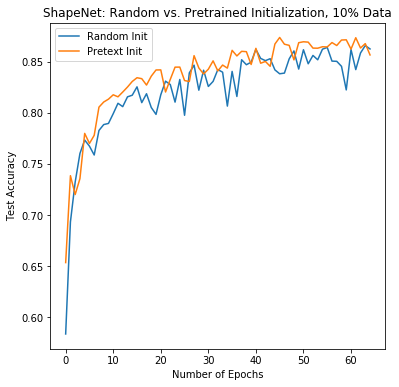

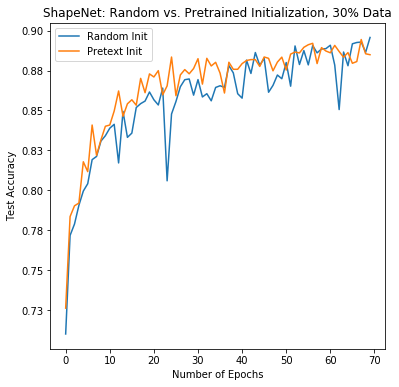

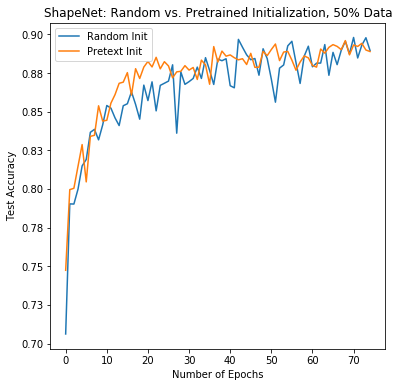

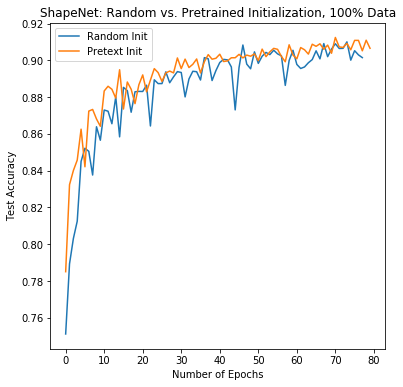

In [10]:
for pct, epoch in zip(pcts, epochs):
    plot_sn_results(pct, epoch)

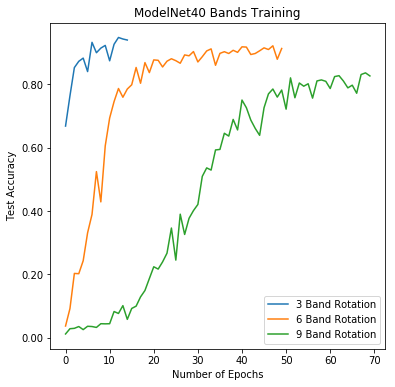

In [11]:
bands = [3, 6, 9]
epochs = [15, 50, 70]
plot_bands(bands, epochs)

In [12]:
plt.figure(figsize=(10,10))
plt.plot(df1['Value'][:15], label='3 Band Rotation')
plt.plot(df2['Value'][:50], label='6 Band Rotation')
plt.plot(df3['Value'][:70], label='9 Band Rotation')
plt.legend()
plt.savefig('results/sn_baseline_v_transfer_100.jpg')

NameError: name 'df1' is not defined

<Figure size 720x720 with 0 Axes>

In [13]:
df1

NameError: name 'df1' is not defined

In [27]:
modelnet10_x = [10, 50, 100]
modelnet10_y = [80, 90, 95]

modelnet10_pretext_x = [10, 50]
modelnet10_pretext_y = [80, 85]

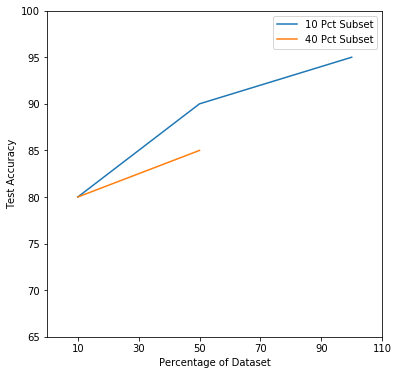

In [28]:
plt.figure(figsize=(6,6))
plt.xlim(0, 110)
plt.ylim(65, 100)
plt.xticks(range(10, 120, 20))
plt.xlabel('Percentage of Dataset')
plt.ylabel('Test Accuracy')

plt.plot(modelnet10_x, modelnet10_y, label='ModelNet10')
plt.plot(modelnet40_x, modelnet40_y, label='ModelNet10 with Pretext')

plt.legend()

In [26]:
plt.legend?